## Кулишенко Макар
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками
## Использую одну возможность сдать д/з без штрафа

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [50]:
print(f"Empty cells: {X.isnull().sum().sum()}")

Empty cells: 0


Пропущенных значений нет, категориальных переменных тоже.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [51]:
np.random.seed(228)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Использовать stratify важно, так как при разбиении выборки на тестовую и тренировочную может случиться дисбаланс (разное соотношение) классов. Например, в тренировочную выборку может вовсе не попасть один из классов, что негативно повлияет на качество модели. Чтобы такого не допустить, используется stratify, который поддерживает соотношение классов в тестовой и тренировочной равное первоначальной выборке

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [54]:
# Масштабируем признаки alcohol и magnesium.
# Делаем fit только на тренировочной выборке (чтобы не подсмотреть ничего лишнего), применяем к обеим
scaler = StandardScaler()
scaler.fit(X_train[['alcohol', 'magnesium']])
X_train_transformed = scaler.transform(X_train[['alcohol', 'magnesium']])
X_test_transformed = scaler.transform(X_test[['alcohol', 'magnesium']])

In [55]:
# Обучим модель kNN
neighbors = pd.Series((1, 3, 5, 10, 15, 25))
# fit train set
clf = neighbors.apply(lambda n: KNeighborsClassifier(n_neighbors=n, metric="euclidean").fit(X_train_transformed, y_train))
# transform and get predictions for train set
train_predictions = clf.apply(lambda val: np.mean(val.predict(X_train_transformed) == y_train))
# transform and get predictions for test set
test_predictions = clf.apply(lambda val: np.mean(val.predict(X_test_transformed) == y_test))


for i in range(6):
  print(f"{i+1}. {round(train_predictions[i], 3)}, {round(test_predictions[i], 3)}")


1. 0.992, 0.63
2. 0.831, 0.741
3. 0.75, 0.759
4. 0.758, 0.704
5. 0.726, 0.667
6. 0.694, 0.722


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [56]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [57]:
import mlxtend
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import itertools

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

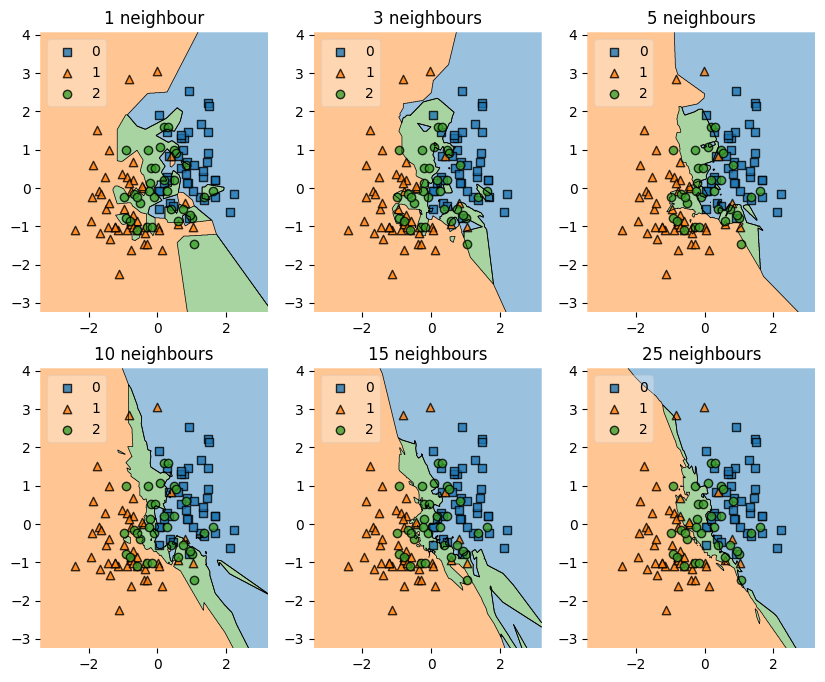

In [58]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['1 neighbour', '3 neighbours', '5 neighbours', '10 neighbours', '15 neighbours', '25 neighbours']
for cur_clf, lab, grd in zip(clf, labels, itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_transformed, y=y_train, clf=cur_clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

По результатам 1.3 и 1.5 можно заметить:

1) При n = 1 и 3 модель показала неплохие результаты, однако по графику видно, что она скорее "подогналась" под обучающую выборку, так как некоторые области (зеленая и синяя) представляют собой кривые области с неровными краями, с фрагментами внутри других цветов.

2) При n = 5 и 10 модели показали хорошие результаты на тестовой выборке, их геометрическая проекция уже более правильной формы и похожа на действительность

3) При n = 15 и 25 заметно падает корректность модели на обучающей выборке, так как количество соседей уже слишком большое (может быть равным трети объема каждого класса). На графике видны серьезные неточности из-за слишком размытых границ. Это может означать, что модель переобучена.

Поэтому, оптимальным будет использование 5 или 10 соседей.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

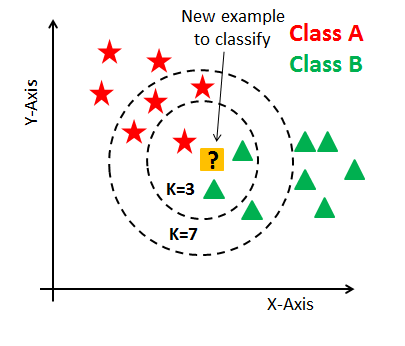

In [59]:
import numpy as np
from collections import Counter
# Импортируем евклидово расстояние
from numpy import linalg
from scipy.stats import mode

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X = X
      self.y = y
      self.m, self.n = X.shape
      return self

    def predict(self, X):
      self.m_test, self.n_test = X.shape
      y_predict = np.zeros(self.m_test)

      for i in range(self.m_test):
        distances = np.zeros(self.m)
        for j in range(self.m):
          distances[j] = self.count_distance(self.X[j], X[i])
        y_sorted = self.y[distances.argsort()]
        y_predict[i] = Counter(y_sorted[:self.k]).most_common()[0][0]
      return y_predict

    def count_distance(self, x, y):
        return linalg.norm(y - x)




In [60]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [61]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [62]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [63]:
print(f"Пропущенных значений: {data.isnull().sum().sum()}")

Пропущенных значений: 0


Пропущенных значений нет!

Никакой информационной ценности не несет столбец Unnnamed: 0, поскольку дублирует индекс со сдвигом на 1. Удалим его

In [64]:
data.drop(columns='Unnamed: 0', inplace=True)

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [65]:
metrics = data[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]
metrics.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


Самая сильная корреляция (> 0.8) наблюдается у карата и размерностей бриллианта

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [66]:
data_dum = pd.get_dummies(data, drop_first=True)
data_dum

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [67]:
# Добавим столбец table, чтобы потом занести в этот столбце номер класса
data_y = data_dum[['price', 'table']]
data_dum.drop(columns='price', inplace=True)
data_y

,price,table
0,326,55.0
1,326,61.0
2,327,65.0
3,334,58.0
4,335,58.0
...,...,...
53935,2757,57.0
53936,2757,55.0
53937,2757,60.0
53938,2757,58.0


Разобъем данные на 10 ценовых категорий (при ~54000 наблюдений должно получиться неплохо), чтобы при разбиении на тренировочную и тестовую выборку баланс классов сохранялся.

Найдем минимум и максимум по цене и разделим разницу на 10

In [68]:
pd.options.mode.chained_assignment = None

In [69]:
data_y['price'] = pd.to_numeric(data_y['price'])
min_val = min(data_y['price'])
max_val = max(data_y['price'])
print(f"min : {min_val}")
print(f"max : {max_val}")
interval = (max_val - min_val) // 10
print(f"interval : {interval}")

min : 326
max : 18823
interval : 1849


In [70]:
def find_cat(value : int) :
  for i in range(10):
    if min_val + interval * i <= value < min_val + interval * (i + 1):
      return i
  return 9

data_y['table'] = data_y['price'].apply(find_cat)
data_y

,price,table
0,326,0
1,326,0
2,327,0
3,334,0
4,335,0
...,...,...
53935,2757,1
53936,2757,1
53937,2757,1
53938,2757,1


In [71]:
np.random.seed(226)
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_dum, data_y['price'], test_size=0.3, stratify=data_y['table'])

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [72]:
scaler1 = StandardScaler()
scaler1.fit(data_X_train)
data_X_train_transformed = scaler1.transform(data_X_train)
data_X_test_transformed = scaler1.transform(data_X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(data_X_train_transformed, data_y_train)
mse_train = mean_squared_error(linear_model.predict(data_X_train_transformed), data_y_train)
print(f"MSE for the linear regression on the train set: {mse_train}")
mse_test = mean_squared_error(linear_model.predict(data_X_test_transformed), data_y_test)
print(f"MSE for the linear regression on the test set: {mse_test}")

MSE for the linear regression on the train set: 1255213.172396726
MSE for the linear regression on the test set: 1328466.9477561626


Для тестовой выборки среднеквадратичное отклонение больше

**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [74]:
feature_names = data_dum.columns.values
df = pd.DataFrame({
    "Feature name": feature_names,
    "Coefficient": linear_model.coef_,
    "Coefficient module": np.abs(linear_model.coef_)
})
df.sort_values(by="Coefficient module", inplace=True, ascending=False)
df

,Feature name,Coefficient,Coefficient module
0,carat,5413.132811,5413.132811
20,clarity_VS2,1771.592137,1771.592137
19,clarity_VS1,1622.826305,1622.826305
17,clarity_SI1,1552.794381,1552.794381
22,clarity_VVS2,1430.149581,1430.149581
21,clarity_VVS1,1244.591871,1244.591871
3,x,-1174.395629,1174.395629
18,clarity_SI2,994.736025,994.736025
16,clarity_IF,932.853374,932.853374
15,color_J,-526.674991,526.674991


Заметим, что наиболее выделяются карат и длина бриллианта

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [75]:
from sklearn.linear_model import Lasso, Ridge

In [76]:
lasso = Lasso(alpha=10)
lasso.fit(data_X_train_transformed, data_y_train)
ridge = Ridge(alpha=10)
ridge.fit(data_X_train_transformed, data_y_train)
print()

Для Lasso-регрессии:



In [77]:
df_lasso = pd.DataFrame({
    "Feature name": feature_names,
    "Coefficient": lasso.coef_,
    "Coefficient module": np.abs(lasso.coef_)
})
df_lasso.sort_values(by="Coefficient module", inplace=True, ascending=False)
df_lasso

,Feature name,Coefficient,Coefficient module
0,carat,4915.735693,4915.735693
20,clarity_VS2,1094.393176,1094.393176
19,clarity_VS1,1037.142965,1037.142965
22,clarity_VVS2,954.938800,954.938800
17,clarity_SI1,861.187999,861.187999
21,clarity_VVS1,836.442985,836.442985
3,x,-717.599016,717.599016
16,clarity_IF,639.338282,639.338282
15,color_J,-467.692835,467.692835
18,clarity_SI2,396.006618,396.006618


Для Ridge-регрессии:


In [78]:
df_ridge = pd.DataFrame({
    "Feature name": feature_names,
    "Coefficient": ridge.coef_,
    "Coefficient module": np.abs(ridge.coef_)
})
df_ridge.sort_values(by="Coefficient module", inplace=True, ascending=False)
df_ridge

,Feature name,Coefficient,Coefficient module
0,carat,5372.899065,5372.899065
20,clarity_VS2,1744.151090,1744.151090
19,clarity_VS1,1599.258331,1599.258331
17,clarity_SI1,1524.541265,1524.541265
22,clarity_VVS2,1411.251236,1411.251236
21,clarity_VVS1,1228.612382,1228.612382
3,x,-1121.110324,1121.110324
18,clarity_SI2,970.803918,970.803918
16,clarity_IF,921.544266,921.544266
15,color_J,-525.374481,525.374481


Использование Lasso-регрессии уменьшило веса коэффициентов примерно на 10%, а Ridge-регрессия показала лишь незначительное уменьшение. Проблема мультиколлинеарности в обычной регрессии присутствует, однако для данного датасета она не не является сильно существенной.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график изменения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [79]:
# Обучим модели Lasso
alpha = pd.Series((0.1, 1, 10, 100, 200))
# fit train set
lasso_models = np.array(alpha.apply(lambda a: np.linalg.norm(Lasso(alpha = a).fit(data_X_train_transformed, data_y_train).coef_)))
ridge_models = np.array(alpha.apply(lambda a: np.linalg.norm(Ridge(alpha = a).fit(data_X_train_transformed, data_y_train).coef_)))

In [80]:
df_reg = pd.DataFrame({
    "Alpha value" : alpha,
    "Lasso regression" : lasso_models,
    "Ridge regression" : ridge_models
    })
df_reg

,Alpha value,Lasso regression,Ridge regression
0,0.1,6721.661900,6733.238405
1,1.0,6604.807428,6726.567788
2,10.0,5515.163668,6661.139939
3,100.0,3869.131651,6108.528745
4,200.0,3580.000924,5642.417640


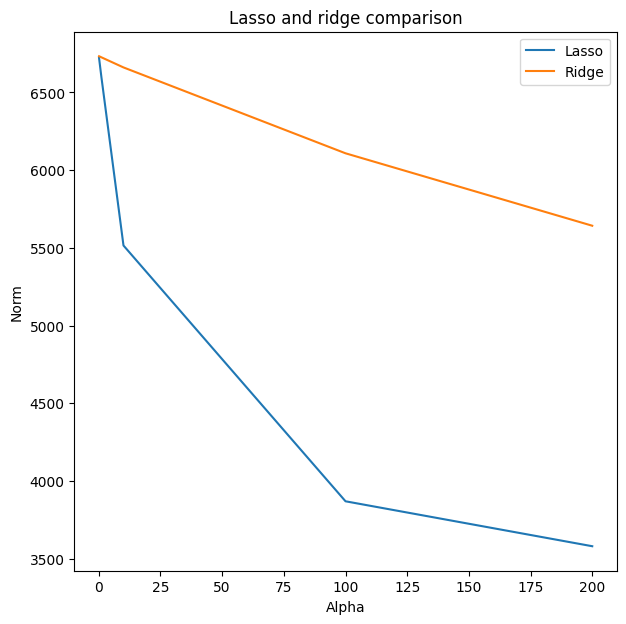

In [81]:
plt.figure(figsize=(7, 7))
plt.plot(df_reg['Alpha value'], df_reg['Lasso regression'], label='Lasso')
plt.plot(df_reg['Alpha value'], df_reg['Ridge regression'], label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('Norm')
plt.title('Lasso and ridge comparison')
plt.legend(loc='best')
plt.show()

Агрессивнее веса уменьшает Lasso-регрессия, которая также может свести к минимуму ценность (вес) незначимых параметров, поэтому ее активно используют для отбора значащих признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [82]:
from sklearn.linear_model import LassoCV

In [83]:
lasso_cv = LassoCV(alphas=alpha, cv=5, random_state=228)
lasso_cv.fit(data_X_train_transformed, data_y_train)
means = lasso_cv.mse_path_.mean(axis=1)
alphas = lasso_cv.alphas_
for element in zip(alphas, means):
  print(element[0], element[1])

200.0 2152356.3063089564
100.0 1776317.3152456763
10.0 1315149.7856805266
1.0 1258619.2057952336
0.1 1258192.0807183753


 Заметим, что оптимальное значение $\alpha$ = 0.1

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [84]:
lasso = Lasso(alpha=0.1, random_state=228)
lasso.fit(data_X_train_transformed, data_y_train)
df_lasso = pd.DataFrame({
    "Feature name": feature_names,
    "Coefficient": lasso.coef_,
})
df_lasso.sort_values(by="Coefficient", inplace=True, ascending=False)
df_lasso

,Feature name,Coefficient
0,carat,5408.867569
20,clarity_VS2,1764.701972
19,clarity_VS1,1616.866304
17,clarity_SI1,1545.766017
22,clarity_VVS2,1425.303493
21,clarity_VVS1,1240.422391
18,clarity_SI2,988.645374
16,clarity_IF,929.852950
7,cut_Ideal,387.053592
8,cut_Premium,311.809530


## Информативные признаки:

1) Карат - оказывает наибольшее влияние. Карат - это вес бриллианта. Логично предположить: чем больше вес, тем больше и сам бриллиант. А значит, и дороже.

2) Высокая чистота - оказывает значительное влияение. Самые лучшие значения clarity (то есть, самые качественные бриллианты) имеют большой вес

3) Длина бриллианта - оказывает большое влияение, уменьшает цену. Бриллиант должен иметь пропорциональные размеры, слишком длинные являются непривлекательными и снижают цену

4) Цвет - плохие цвета значительно снижают цену драгоценного камня

## Неинформативные признаки:

1) Ширина и высота - возможно, depth уже включает в себя эти понятие с нужными весами, поэтому сами по себе они могут особо не играть роли

2) Огранка - играет незначительную роль, поскольку бриллиант можно повторно огранить.



**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [85]:
prediction = lasso.predict(data_X_test_transformed)
mse = mean_squared_error(prediction, data_y_test)
print(f"Lasso: {mse}\nLinear: {mse_test}")

Lasso: 1328477.441328956
Linear: 1328466.9477561626


Среднеквадратичная ошибка Lasso и обычной регрессии практически совпадаю. Это связано с тем, что в данном случае Lasso-регрессия уменьшила значения коэффициентов незначительно (пункт 3.8), поэтому обе регрессии показалали примерно одинаковое качество.

Однако, для других наборов данных, где можно более точно выделить значащие и незначимые признаки, Lasso-регрессия может сильно уменьшит веса, что сделает модель более точной.